In [3]:
import matplotlib.pyplot as plt
import math as m
import itertools as it
import functools as ft
from sympy import Point

from copy import copy
from typing import Tuple, Iterable, Union

from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from sympy import *
import numpy as np
import math
from itertools import islice, count

# Базовая часть
### Задание 1

Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib, см. пример): https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py

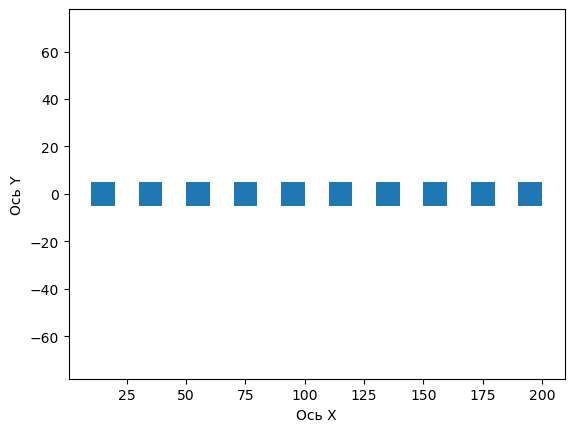

In [7]:
for i in islice(count(1), 10):
  fig1 = plt.Rectangle((i*20, -5), 10, 10,  angle = 90.0, fill = True)
  ax = plt.gca()
  ax.add_patch(fig1)

# plt.grid()
plt.axis('equal') 
plt.xlabel("Ось Х") 
plt.ylabel("Ось Y") 
plt.show() 

### Задание 2
база

Реализовать функции, генерирующие бесконечную последовательность не пересекающихся полигонов с различающимися координатами (например, «ленту»): 1. прямоугольников ( gen_rectangle() ); 2. треугольников ( gen_triangle() ); 3. правильных шестиугольников ( gen_hexagon() ). 4. с помощью данных функций используя функции из модуля itertools сгенерировать 7 фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

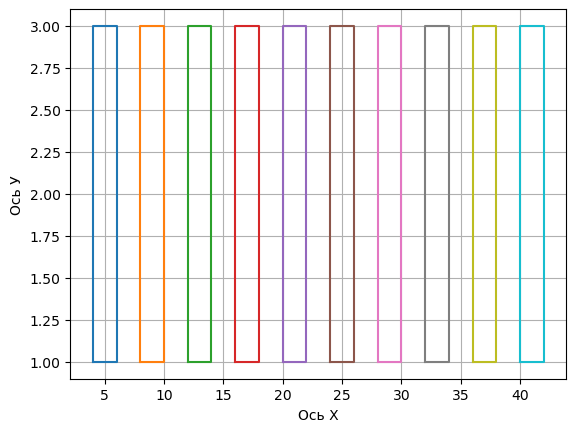

In [5]:
#для прямоугольника
def  gen_rectangle():
  x = [i*4, i*4+2, i*4+2, i*4, i*4]
  y = [1, 1, 3, 3, 1]
  return plt.plot(x, y)

for i in islice(count(1), 10):
  gen_rectangle()

plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show()

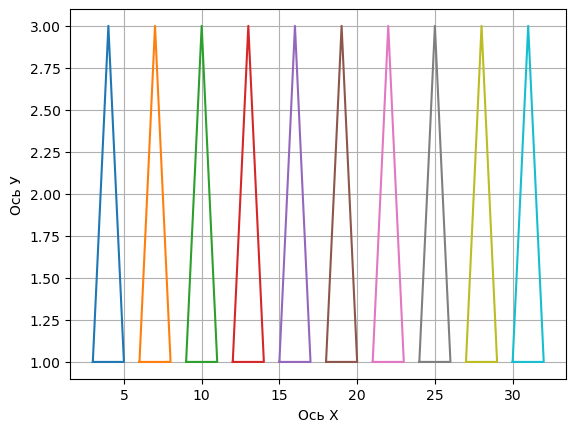

In [8]:
#для треугольника
def  gen_triangle():
  x = [i*3, i*3+2, i*3+1, i*3]
  y = [1, 1, 3, 1]
  return plt.plot(x, y)

for i in islice(count(1), 10):
  gen_triangle()

plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show()

Text(0, 0.5, 'Ось У')

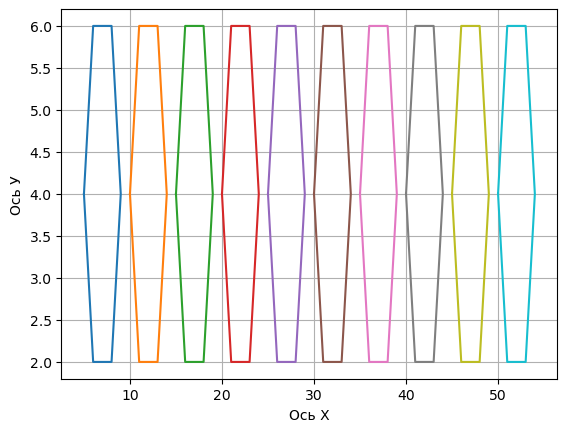

In [10]:
#для шестиугольника
def  gen_hexagon():
  x = [i*5, i*5+1, i*5+3, i*5+4, i*5+3, i*5+1, i*5]
  y = [4, 2, 2, 4, 6, 6, 4]
  return plt.plot(x, y)

for i in islice(count(1), 10):
  gen_hexagon()

plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')

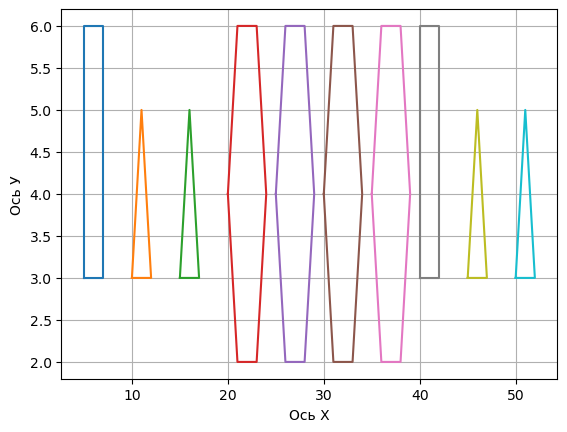

In [11]:
#смешанные
from random import randint
def gen(): # смешанные
    r = randint(1,3)
    if r == 1:
      x = [i*5, i*5+2, i*5+2, i*5, i*5]
      y = [3, 3, 6, 6, 3]
    elif r == 2:
      x = [i*5, i*5+2, i*5+1, i*5]
      y = [3, 3, 5, 3]
    else:
      x = [i*5, i*5+1, i*5+3, i*5+4, i*5+3, i*5+1, i*5]
      y = [4, 2, 2, 4, 6, 6, 4]
    return plt.plot(x,y)

for i in islice(count(1), 10):
  gen()

plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show()

### Задание 3
Реализовать операции: 
параллельный перенос ( tr_translate );
поворот ( tr_rotate );
симметрия ( tr_symmetry ); 
гомотетия ( tr_homothety );

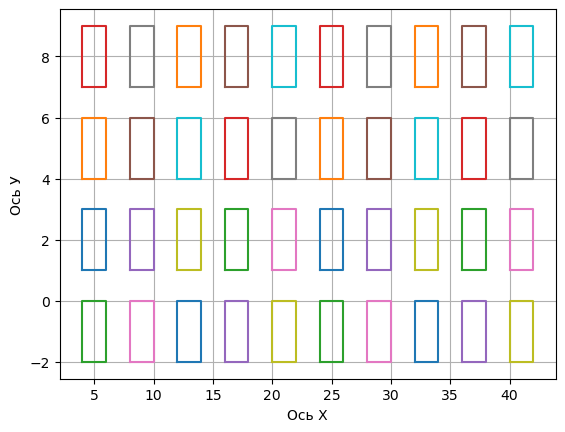

In [12]:
#параллельный перенос
def tr_translate(k, x, y):
  s = []
  for j in y:
    j += k
    s.append(j)
  return plt.plot(x, s)

for i in islice(count(1), 10):
  x = [i*4, i*4+2, i*4+2, i*4, i*4]
  y = [1, 1, 3, 3, 1]
  plt.plot(x, y)
  tr_translate(3, x, y)
  tr_translate(-3, x, y)
  tr_translate(6, x, y)


plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show() 

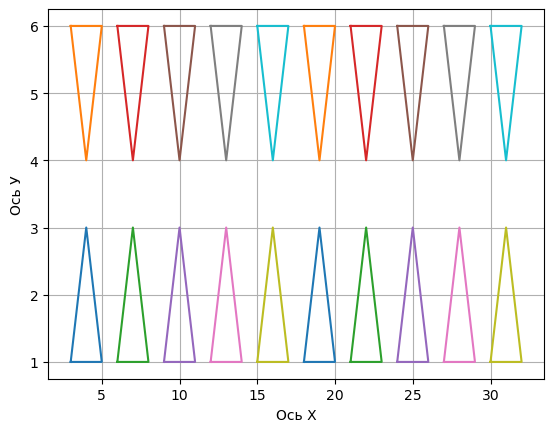

In [13]:
#симметрия
def tr_symmetry(k, x, y):
  s = []
  for j in y:
    j += k
    s.append(j)
  return plt.plot(x, s)

for i in islice(count(1), 10):
  x = [i*3, i*3+2, i*3+1, i*3]
  y1 = [1, 1, 3, 1]
  y2 = [3, 3, 1, 3]
  plt.plot(x, y1)
  tr_symmetry(3, x, y2)

plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show() 


In [13]:
def tr_homothety(coordinates: Iterable[Tuple], k=2.5) -> Iterable[Tuple]:
    fig = []
    for figure in coordinates:
        x, y = zip(figure)
        
        x_ = tuple(_x * k for _x in x)
        y_ = tuple(_y * k for _y in y)
        for x, y in zip(x_, y_):
            fig.append(tuple((x, y)))

    return fig

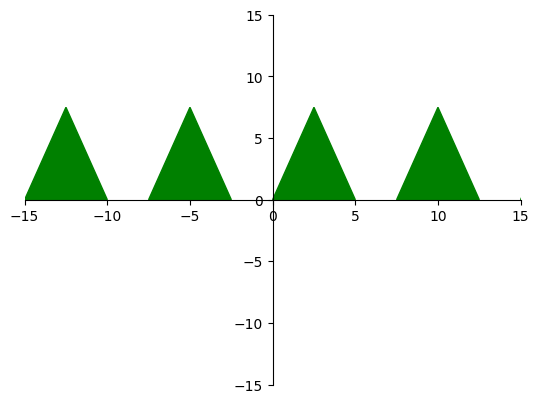

In [14]:
draw_polygons(map(tr_homothety, gen_triangle()))

### Задание 4
С помощью данных функций создать и визуализировать:
1.	3 параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси x;
2.	две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;
3.	две параллельных ленты треугольников, ориентированных симметрично друг к другу;
4.	последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат (см. рис.).


Введите количество элементов 10


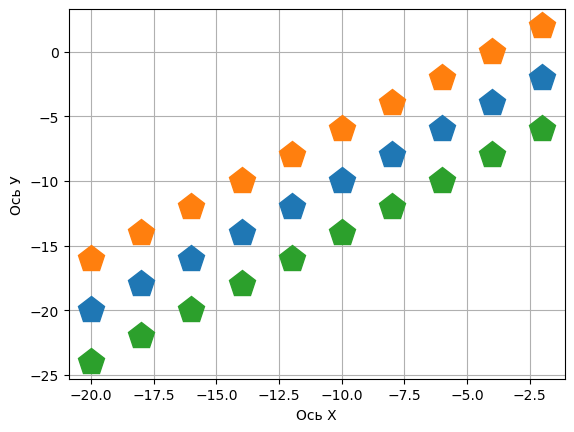

In [14]:
#4.1
x = []
n = int(input('Введите количество элементов '))
for i in islice(count(-n), n):
    x.append(i*2)
x = np.array(x)
plt.plot(x, x, linestyle='', marker = 'p', markersize = 20)
plt.plot(x, x+4,  linestyle='', marker = 'p', markersize = 20)
plt.plot(x, x-4,  linestyle='', marker = 'p', markersize = 20)
plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show()

Введите количество элементов 10


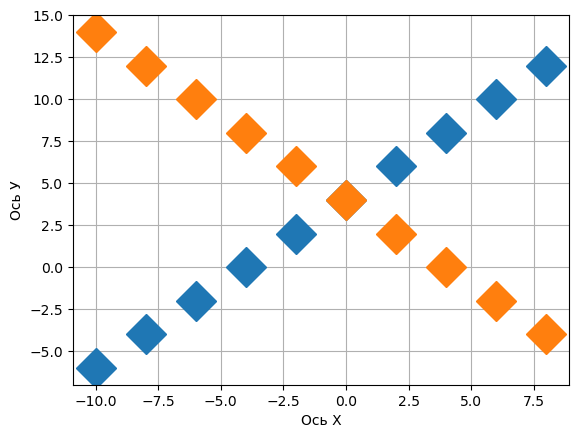

In [15]:
#4.2
x = []
n = int(input('Введите количество элементов '))
for i in islice(count(-n/2), n):
    x.append(i*2)
x = np.array(x)

plt.plot(x, x+4,  linestyle='', marker = 'D', markersize = 20)
plt.plot(x, 4-x,  linestyle='', marker = 'D', markersize = 20)
plt.grid()
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show()

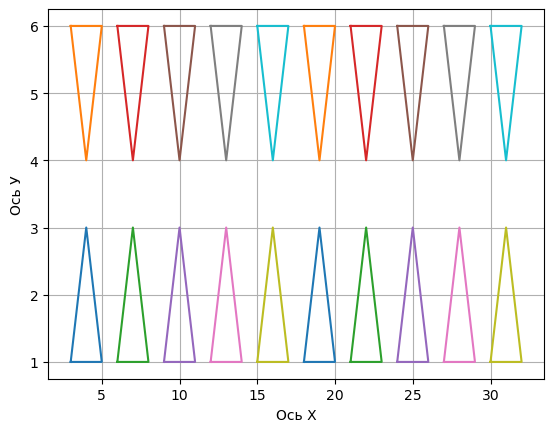

In [16]:
#4.3
#симметрия
def tr_symmetry(k, x, y):
  s = []
  for j in y:
    j += k
    s.append(j)
  return plt.plot(x, s)

for i in islice(count(1), 10):
  x = [i*3, i*3+2, i*3+1, i*3]
  y1 = [1, 1, 3, 1]
  y2 = [3, 3, 1, 3]
  plt.plot(x, y1)
  tr_translate(3, x, y2)

plt.grid()
# plt.axis('scaled')
plt.xlabel('Ось Х')
plt.ylabel('Ось У')
plt.show() 

In [18]:
def draw_homothety(coordinates: Iterable[Tuple], n) -> None:
    if n == 0: return
    coord = list(coordinates)
    draw_polygons(coord)
    coord = map(tr_homothety, coord)
    draw_homothety(coord, n - 1)

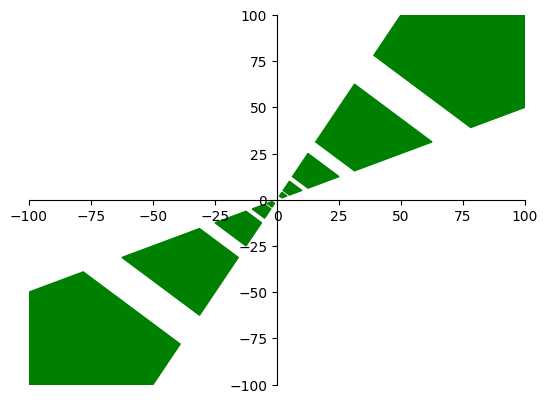

In [19]:
coord = iter((
    ((1, 2), (2, 4), (4, 2), (2, 1)),
    ((-1, -2), (-2, -4), (-4, -2), (-2, -1))
))

draw_homothety(coord, 5)

plt.xlim(-100, 100)
plt.ylim(-100, 100);

### Задание 5
Реализовать операции: 
1.	фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon )
2.	фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой ( flt_angle_point );
3.	фильтрации фигур, имеющих площадь менее заданной ( flt_square );
4.	фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side );
5.	фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside );
6.	фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside );
которые можно применить к последовательности полигонов с помощью функции filter.


In [20]:
def flt_convex_polygon(coordinates: Tuple[Tuple]) -> bool:
    points = [Point(*c) for c in coordinates]
    polygon = Polygon(points)
    if polygon == polygon.convex_hull:
        return True
    return False

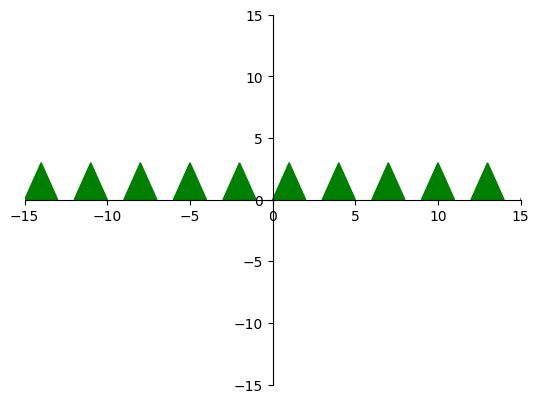

In [21]:
draw_polygons(filter(flt_convex_polygon, gen_triangle()))

In [22]:
def flt_angle_point(coordinates: Tuple[Tuple], angle: Tuple = (0, 0)) -> bool:
    for point in coordinates:
        if point == angle:
            return False
    return True

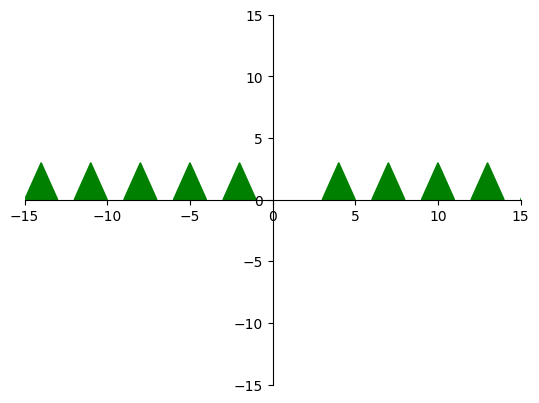

In [23]:
draw_polygons(filter(flt_angle_point, gen_triangle()))

In [24]:
def flt_square(coordinates: Tuple[Tuple], area: int = 2) -> bool:
    return True if Polygon(coordinates).area > area else False

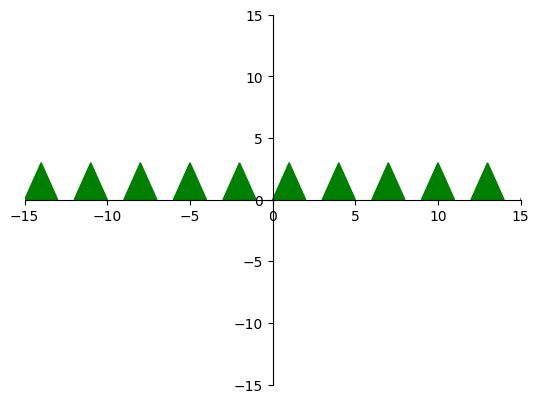

In [25]:
draw_polygons(filter(flt_square, gen_triangle()))

In [26]:
def flt_short_side(coordinates: Tuple[Tuple], side=1, reverse: bool = False) -> bool:
    shortest_side = None
    for first_point in coordinates:
        x1, y1 = first_point
        for second_point2 in coordinates:
            x2, y2 = second_point2
            if (x1, y1) == (x2, y2): continue
            side_ = (((x1 - x2) ** 2) + ((y1 - y2) ** 2)) ** 0.5
            if shortest_side == None:
                shortest_side = side_
            if side_ < shortest_side:
                shortest_side = side_
    if shortest_side < side:
        return reverse
    return not reverse

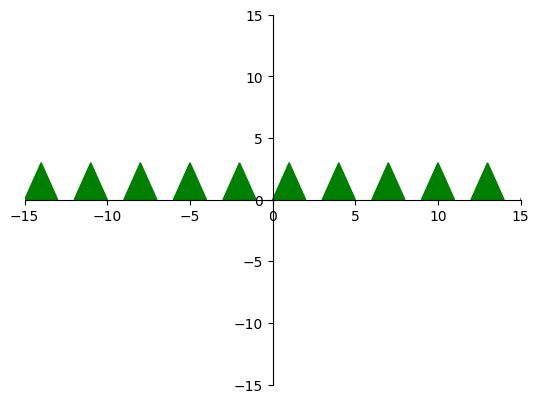

In [27]:
draw_polygons(filter(flt_short_side, gen_triangle()))

In [28]:
def flt_point_inside(coordinates: Tuple[Tuple], point: Tuple = (0, 0)) -> bool:
    if flt_convex_polygon(coordinates):
        x, y = zip(*coordinates)
        x_max, x_min = max(x), min(x)
        y_max, y_min = max(y), min(y)
        return x_min <= point[0] <= x_max and y_min <= point[1] <= y_max
    return False

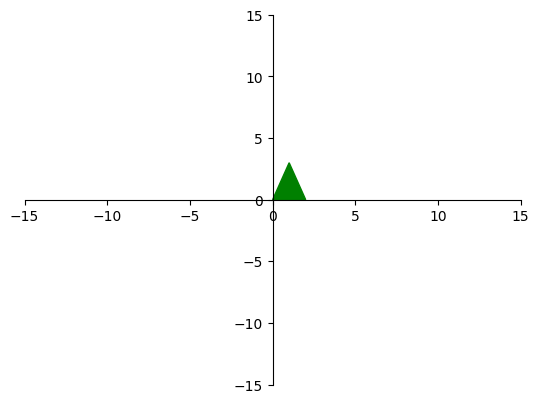

In [29]:
draw_polygons(filter(flt_point_inside, gen_triangle()))

In [30]:
def flt_polygon_angles_inside(coordinates: Tuple[Tuple],
                              polygon: Tuple[Tuple] = ((0, 0), (0, 1), (1, 1), (1, 0))) -> bool:
    if flt_convex_polygon(coordinates):
        x, y = zip(*coordinates)
        x_max, x_min = max(x), min(x)
        y_max, y_min = max(y), min(y)
        for point in polygon:
            if x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
                return False
        return True
    return False

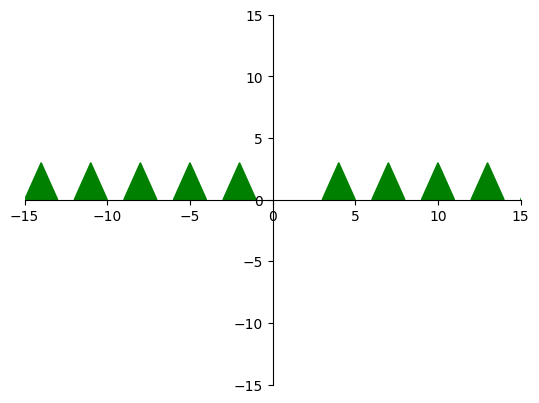

In [31]:
draw_polygons(filter(flt_polygon_angles_inside, gen_triangle()))

### Задание 6
С помощью данных функций реализовать и визуализировать:
1.	фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено 6 фигур;
2.	используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур, которые имеют различный масштаб и выбрать из них (подбором параметра фильтрации) не более 4х фигур, имеющих кратчайшую сторону менее заданного значения;
3.	используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.


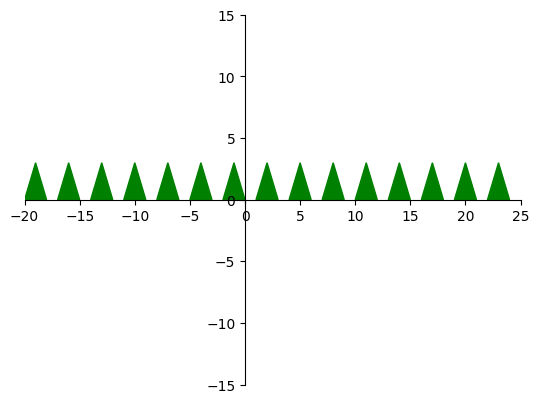

In [32]:
draw_polygons(gen_triangle(start=-20, count=15), x_limit=(-20, 25), y_limit=(-15, 15))

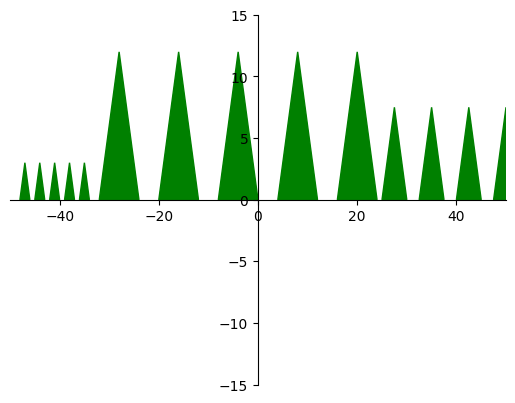

In [33]:
draw_polygons(map(tr_homothety, gen_triangle(start=10, count=5)))
draw_polygons(gen_triangle(start=-48, count=5))
draw_polygons(map(ft.partial(tr_homothety, k=4), gen_triangle(start=-8, count=5)), x_limit=(-50, 50), y_limit=(-15, 15))

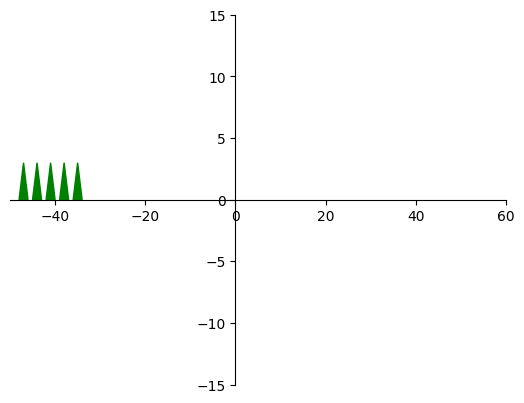

In [34]:
lst = [map(tr_homothety, gen_triangle(start=10, count=5)), gen_triangle(start=-48, count=5),
       map(ft.partial(tr_homothety, k=4), gen_triangle(start=-8, count=5))]
for itr_1 in lst:
    draw_polygons(filter(ft.partial(flt_short_side, side=5, reverse=True), itr_1), x_limit=(-50, 60), y_limit=(-15, 15))

### Задание 7
Реализовать декораторы и продемонстрировать корректность их работы:
1.	Фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 5: @flt_convex_polygon, @flt_angle_point, @flt_square, @flt_short_side, @flt_point_inside, @flt_polygon_angles_inside ;
2.	Преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из 3: @tr_translate, @tr_rotate, @tr_symmetry, @tr_homothety 


In [59]:
def tr_translate(move_up: int = 6, move_sideways: int = 0):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)
            translated_coordinates = []
            for figure in coordinates:
                translated_figure = []
                for x, y in figure:
                    translated_x = x + move_sideways
                    translated_y = y + move_up
                    translated_figure.append((translated_x, translated_y))
                translated_coordinates.append(tuple(translated_figure))
            return translated_coordinates
        return wrapper
    return decorator

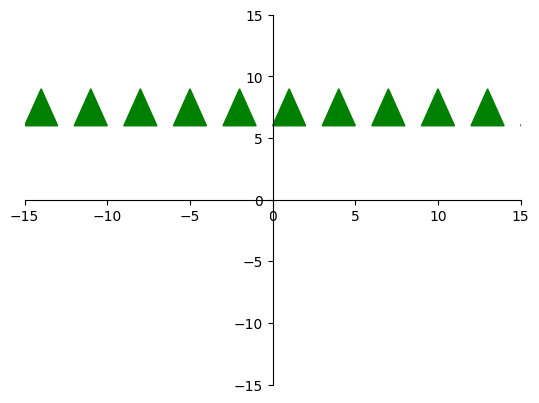

In [61]:
@tr_translate(move_up=6, move_sideways=0)
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100) -> Iterable[Tuple]:
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

In [37]:
def tr_rotate(angle: int = 30):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)

            def rotate_point(point, angle):
                x, y = point
                cos = m.cos(angle)
                sin = m.sin(angle)
                new_x = x * cos - y * sin
                new_y = x * sin + y * cos
                return new_x, new_y

            radians = m.radians(angle)
            fig = []
            for figure in coordinates:
                fig.append([rotate_point(point, radians) for point in figure])
            return fig

        return wrapper

    return decorator

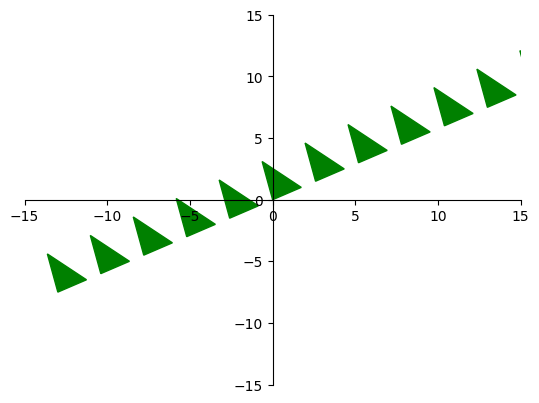

In [38]:
@tr_rotate()
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100) -> Iterable[Tuple]:
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

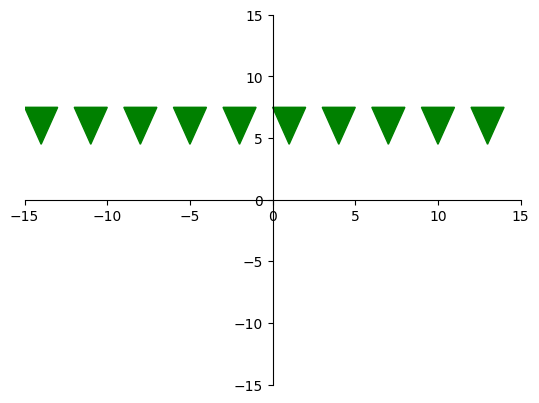

In [39]:
def tr_translate(coordinates: Iterable[Tuple], move_up: int = 6, move_sideways: int = 0) -> Iterable[Tuple]:
    fig = []
    for figure in coordinates:

        x, y = zip(figure)
        y = tuple(_y + move_up for _y in y)
        x = tuple(_x + move_sideways for _x in x)

        for x, y in zip(x, y):
            fig.append((x, y))

    return fig


def tr_rotate(coordinates: Iterable[Tuple], angle: int = 30) -> Iterable[Tuple]:
    def rotate_point(point, angle):
        x, y = point
        cos = m.cos(angle)
        sin = m.sin(angle)
        new_x = x * cos - y * sin
        new_y = x * sin + y * cos
        return new_x, new_y

    radians = m.radians(angle)

    return [rotate_point(point, radians) for point in coordinates]


def tr_simmetry(func):
    def wrapper():
        coordinates = func()
        itr = map(ft.partial(tr_translate, move_up=-7.5, move_sideways=1), coordinates)
        result = [i for i in map(ft.partial(tr_rotate, angle=180), itr)]
        return result

    return wrapper


@tr_simmetry
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100) -> Iterable[Tuple]:
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

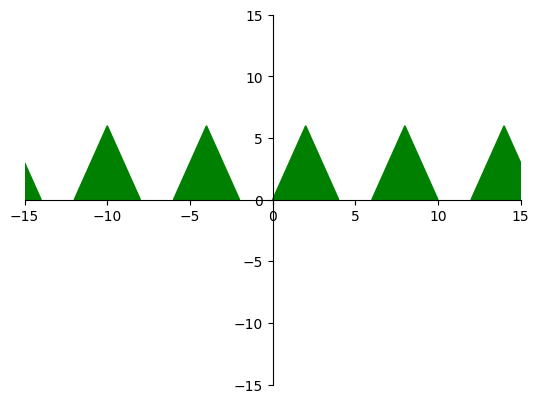

In [40]:
def tr_homothety(k):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)
            coord = []
            for figure in coordinates:
                polygon = []
                for fig in figure:
                    x, y = zip(fig)
                    x_ = tuple(_x * k for _x in x)
                    y_ = tuple(_y * k for _y in y)
                    for x, y in zip(x_, y_):
                        polygon.append(tuple((x, y)))
                coord.append(tuple(polygon))
            return coord

        return wrapper

    return decorator


@tr_homothety(2)
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100) -> Iterable[Tuple]:
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

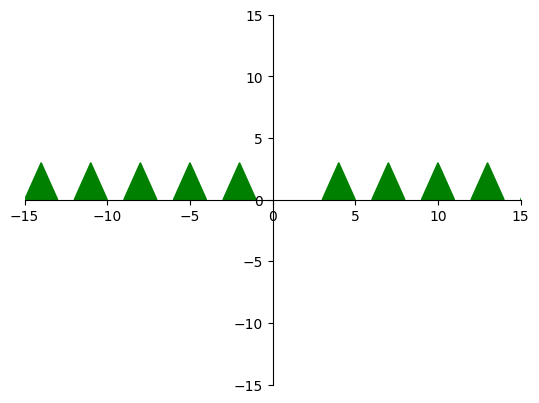

In [41]:
def flt_point_inside(point):
    def decorator(func):
        def wrapper(*args, **kwargs):
            coordinates = func(*args, **kwargs)
            coord = []
            for figure in coordinates:
                if flt_convex_polygon(figure):
                    x, y = zip(*figure)
                    x_max, x_min = max(x), min(x)
                    y_max, y_min = max(y), min(y)
                    if not (x_min <= point[0] <= x_max and y_min <= point[1] <= y_max):
                        coord.append(figure)
            return coord

        return wrapper

    return decorator


@flt_point_inside(point=(0, 0))
def gen_triangle(length: int = 3, height: int = 3, start: int = -15, count: int = 100) -> Iterable[Tuple]:
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 2, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)

    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _y1, _y2 = next(x1), next(x2), next(x3), next(y1), next(y2)
        itr.append(((_x1, _y2), (_x2, _y1), (_x3, _y2)))

    return iter(itr)


draw_polygons(gen_triangle())

### Задание 8
Реализовать функции и продемонстрировать их корректность: 
1.	поиск угла, самого близкого к началу координат ( agr_origin_nearest );
2.	поиск самого длинной стороны многоугольника ( agr_max_side ); 
3.	поиск самой маленькой площади многоугольника ( agr_min_area );
4.	расчет суммарного периметра ( agr_perimeter );
5.	расчет суммарной площади ( agr_area ).
которые можно применить к последовательности полигонов с помощью функции functools.reduce .


In [42]:
def agr_area(all_area: Union[float, int], coordinates: Iterable[Tuple]) -> Union[float, int]:
    return all_area + Polygon(coordinates).area


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(agr_area, coord, 0))

9.0


In [43]:
def arg_perimeter(all_perimiter, coordinates: Iterable[Tuple]) -> Union[float, int]:
    coordinates = list(coordinates)
    coordinates[len(coordinates) - 1] = coordinates[0]
    perimeter = 0
    for side in range(len(coordinates) - 1):
        x1, y1 = coordinates[side]
        x2, y2 = coordinates[side + 1]
        perimeter += (((x2 - x1) ** 2) - (y2 - y2) ** 2) ** 0.5
    return all_perimiter + perimeter


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_perimeter, coord, 0))

10.0


In [44]:
def arg_min_area(min_area, coordinates: Iterable[Tuple]) -> Union[float, int]:
    if min_area == 0:
        return Polygon(coordinates).area
    elif min_area > Polygon(coordinates).area:
        min_area = Polygon(coordinates).area
    return min_area


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_min_area, coord, 0))

1.0


In [45]:
def arg_max_side(max_side, coordinates: Iterable[Tuple]) -> Union[float, int]:
    coordinates = list(coordinates)
    coordinates[len(coordinates) - 1] = coordinates[0]
    for side in range(len(coordinates) - 1):
        x1, y1 = coordinates[side]
        x2, y2 = coordinates[side + 1]
        side = (((x2 - x1) ** 2) - (y2 - y2) ** 2) ** 0.5
        if side > max_side:
            max_side = side
    return max_side


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_max_side, coord, 0))

2.0


In [46]:
def arg_origin_nearest(angle_coordinates: Union[Tuple, None], coordinates: Iterable[Tuple]) -> Tuple:
    if angle_coordinates == None:
        angle_coordinates = coordinates[0]
    for side in coordinates:
        if angle_coordinates[0] > abs(side[0]) and angle_coordinates[1] > abs(side[1]):
            angle_coordinates = abs(side[0]), abs(side[1])
    return angle_coordinates


coord = iter((
    ((-4, 0), (-4, 2), (-2, 2), (-2, 0)),
    ((-1, -1), (-1, 1), (1, 1), (1, -1)),
    ((2, 0), (3, 1), (4, 0))
))
print(ft.reduce(arg_origin_nearest, coord, None))

(-4, 0)
